# Noisy Integrable Traceout

In [80]:
import sys
sys.path.insert(0, '../../../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import tensorflow as tf
import random
import pickle as pkl

from qiskit.quantum_info import Operator, Statevector
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm
from math import ceil

from quantum_circuits import integrable_circuit, nonintegrable_circuit_star, integrable_circuit_star
from quantum_tools import circuit_to_matrix
from kraus_channels import isomery_to_kraus, KrausMap
from quantum_channel import ConcatChannel, DilutedChannel, IdentityChannel
from utils import numberToBase
from spectrum import complex_spacing_ratio, channel_spectrum, Spectrum, mean_spacing, coat_spectrum, spectrum_to_radial, spectrum_to_angular
from qiskit.circuit.library import iSwapGate, XGate, YGate, HGate, CXGate, RGate, RZGate

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=1)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


In [2]:
from scipy.optimize import curve_fit

def func1(x, a, b,):
    return a*x**b

def func2(x, a, b, c):
    return a*x**b + c

In [12]:
def stats(radial_list, angular_list):
    N = len(radial_list)
    r_mean_list = []
    a_mean_list = []
    for radial, angular in zip(radial_list, angular_list):
        r_mean = np.mean(radial)
        a_mean = -np.mean(np.cos(angular))

        r_mean_list.append(r_mean)
        a_mean_list.append(a_mean)

    r_mean = np.mean(r_mean_list)
    r_std = np.std(r_mean_list)/np.sqrt(N)

    a_mean = np.mean(a_mean_list)
    a_std = np.std(a_mean_list)/np.sqrt(N)

    return r_mean, r_std, a_mean, a_std

## Circuits

In [3]:
def integrable_circuit(n, L):
    theta_list = [np.random.uniform(-np.pi, np.pi, n) for i in range(L)]
    sqrt_iSWAP = iSwapGate().power(1 / 2)

    circuit = qk.QuantumCircuit(n)
    for i, theta in enumerate(theta_list):

        offset = i%2
        for j in range(n):
            circuit.rz(theta[j], j)

        for j in range((n - offset) // 2):
            circuit.append(sqrt_iSWAP, [2 * j + offset, 2 * j + 1 + offset])


    return circuit


def sample_csr(n, reps, circuit_type, p=0, L=5, noise_rank=2):

    d = 2**n

    map_list = []
    spectra_list = []
    csr_list = []

    U_list = []
    for _ in range(reps):
        circuit = circuit_type(n+1, L)
        U = Operator(circuit).data
        U_list.append(U)

    for i in tqdm(range(reps)):
        U = U_list[i]
        kraus_integ = isomery_to_kraus(U, rank = 2)
        if p != 0:
            kraus_chaos = KrausMap(d, noise_rank)
            kraus_map = DilutedChannel(kraus_integ, kraus_chaos, p=p)
        else:
            kraus_map = kraus_integ

        map_list.append(kraus_map)
        
        spectrum = channel_spectrum(kraus_map)
        spectra_list.append(spectrum)
        csr = complex_spacing_ratio(spectrum, log=False)
        csr_list.append(csr)

    return  map_list, spectra_list, csr_list

## Reproduce Observed Data

## Integrable

In [6]:
popt1 = [0.0324, 0.5649]
popt2 = [3.8643e-04, 2.1435e+00, 1.2948e+01]

In [83]:
def emulate(L, reps):
    n = 4

    CNOTS = 4*L
    p = func1(CNOTS, *popt1)
    r = ceil(func2(CNOTS, *popt2))


    _, spectra_integrable_list, csr_integrable_list = sample_csr(n, reps, integrable_circuit, p=p, L=L, noise_rank=r)

    radial = spectrum_to_radial(csr_integrable_list)
    angular = spectrum_to_angular(csr_integrable_list)

    r_mean, r_std, a_mean, a_std = stats(radial, angular)

    csr_integrable = Spectrum(csr_integrable_list)
    csr_integrable_coat = coat_spectrum(csr_integrable, sigma = 0.05)

    fig = plt.figure(figsize=(5, 5))
    fig.tight_layout()
    plt.imshow(csr_integrable_coat, interpolation='nearest')
    plt.show()

    return r_mean, r_std, a_mean, a_std

  0%|          | 0/1000 [00:00<?, ?it/s]

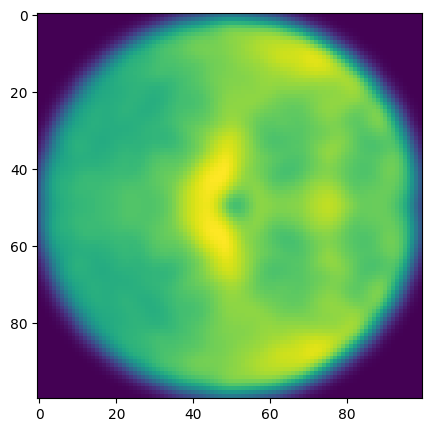

In [34]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

L=5
reps = 1000

r_mean_L5, r_std_L5, a_mean_L5, a_std_L5 = emulate(L, reps)
    

  0%|          | 0/1000 [00:00<?, ?it/s]

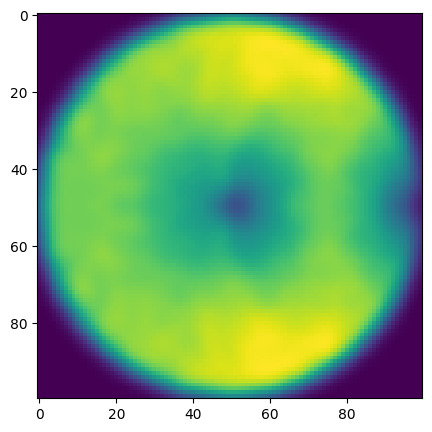

In [35]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

L=10
reps = 1000

r_mean_L10, r_std_L10, a_mean_L10, a_std_L10 = emulate(L, reps)
    

  0%|          | 0/1000 [00:00<?, ?it/s]

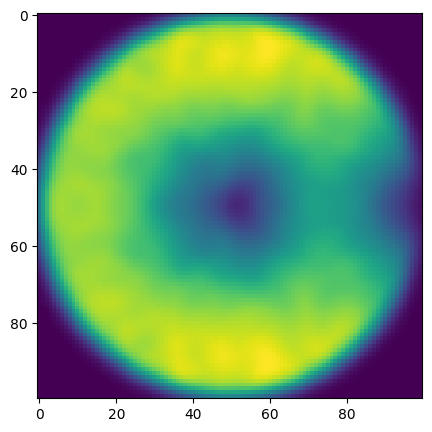

In [36]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

L=20
reps = 1000

r_mean_L20, r_std_L20, a_mean_L20, a_std_L20 = emulate(L, reps)
    

  0%|          | 0/1000 [00:00<?, ?it/s]

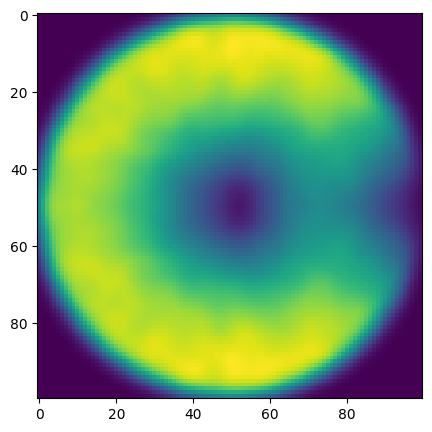

In [37]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

L=30
reps = 1000

r_mean_L30, r_std_L30, a_mean_L30, a_std_L30 = emulate(L, reps)
    

  0%|          | 0/1000 [00:00<?, ?it/s]

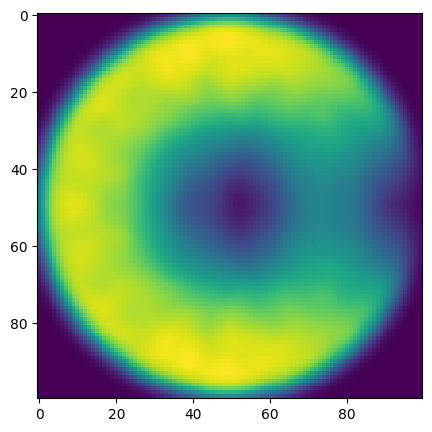

In [38]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

L=40
reps = 1000

r_mean_L40, r_std_L40, a_mean_L40, a_std_L40 = emulate(L, reps)
    

  0%|          | 0/1000 [00:00<?, ?it/s]

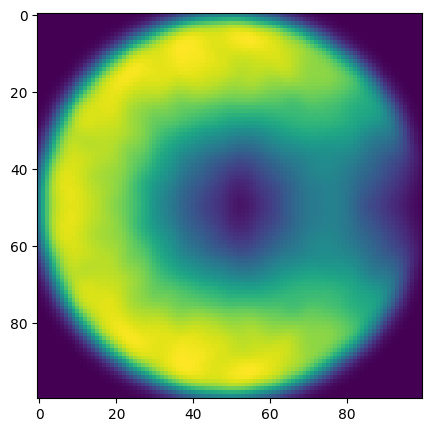

In [39]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

L=50
reps = 1000

r_mean_L50, r_std_L50, a_mean_L50, a_std_L50 = emulate(L, reps)
    

In [77]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

L=75
reps = 1000

r_mean_L75, r_std_L75, a_mean_L75, a_std_L75 = emulate(L, reps)
    

  0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: 

  0%|          | 0/1000 [00:00<?, ?it/s]

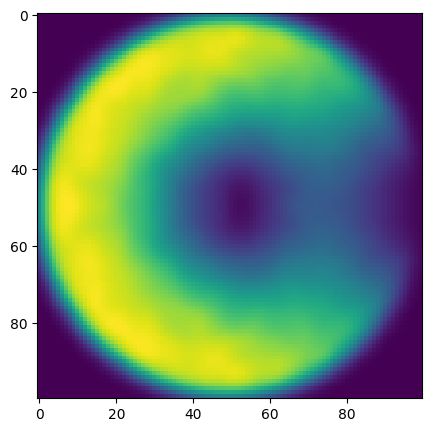

In [41]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

L=100
reps = 1000

r_mean_L100, r_std_L100, a_mean_L100, a_std_L100 = emulate(L, reps)
    

In [78]:
r_poisson, a_poisson = 2/3, 0
r_AI, a_AI = 0.7281304166154063, 0.19742124056951219
r_FF, a_FF = 0.615310151004864, -0.08983735962503564

r_mean_list = [r_mean_L5, r_mean_L10, r_mean_L20, r_mean_L30, r_mean_L40, r_mean_L50]
a_mean_list = [a_mean_L5, a_mean_L10, a_mean_L20, a_mean_L30, a_mean_L40, a_mean_L50]


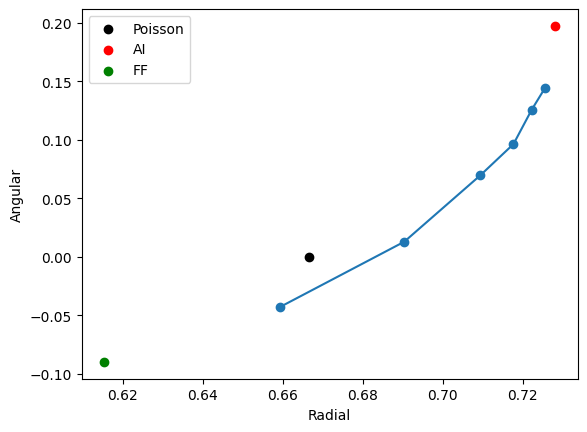

In [79]:
plt.plot(r_mean_list, a_mean_list, "o-")

plt.scatter(r_poisson, a_poisson, label='Poisson', color='black')
plt.scatter(r_AI, a_AI, label='AI', color='red')
plt.scatter(r_FF, a_FF, label='FF', color='green')

plt.xlabel('Radial')
plt.ylabel('Angular')
plt.legend()
plt.show()


In [82]:
pkl.dump([r_mean_list, a_mean_list], open('data/diluted_scatter_emulation.pkl', 'wb'))